In [1]:
#importing required packages and libraries
import pandas as pd
import psycopg2
import plotly.express as px
from plotly.subplots import make_subplots
import datetime as dt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# PostgreSQL connection details
postgres_host = "localhost"
postgres_port = "5432"
postgres_user = "dap"
postgres_password = "dap"
postgres_dbname = "postgres"
postgres_table_name = "crashes"

# Connecting to the PostgreSQL database
conn = psycopg2.connect(
    dbname=postgres_dbname,
    user=postgres_user,
    password=postgres_password,
    host=postgres_host,
    port=postgres_port
)
print("Connected to PostgreSQL database...")

# writing a SQL query to retrieve the required columns from the desired table
Sql_Query = """ SELECT "CRASH DATE", "LATITUDE", "LONGITUDE", "NUMBER OF PERSONS INJURED",
                                  "NUMBER OF PERSONS KILLED", "NUMBER OF PEDESTRIANS INJURED",
                                  "NUMBER OF PEDESTRIANS KILLED", "NUMBER OF CYCLIST INJURED",
                                  "NUMBER OF CYCLIST KILLED", "NUMBER OF MOTORIST INJURED",
                                  "NUMBER OF MOTORIST KILLED", "CONTRIBUTING FACTOR VEHICLE 1",
                                  "VEHICLE TYPE CODE 1","COLLISION_ID"
    FROM crashes
"""

# Creating a cursor
cur = conn.cursor()

# Executing the SQL query
cur.execute(Sql_Query)

# Fetching all the rows from the result set
rows = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()
print("Connection closed")

Connected to PostgreSQL database...
Connection closed


In [2]:
# Creating a DataFrame(MC_df) from the rows fetched from PostgreSQL
MC_df = pd.DataFrame(rows, columns=["CRASH DATE", "LATITUDE", "LONGITUDE", "NUMBER OF PERSONS INJURED",
                                  "NUMBER OF PERSONS KILLED", "NUMBER OF PEDESTRIANS INJURED",
                                  "NUMBER OF PEDESTRIANS KILLED", "NUMBER OF CYCLIST INJURED",
                                  "NUMBER OF CYCLIST KILLED", "NUMBER OF MOTORIST INJURED",
                                  "NUMBER OF MOTORIST KILLED", "CONTRIBUTING FACTOR VEHICLE 1",
                                  "VEHICLE TYPE CODE 1","COLLISION_ID"])

MC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040647 entries, 0 to 2040646
Data columns (total 14 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   CRASH DATE                     object
 1   LATITUDE                       object
 2   LONGITUDE                      object
 3   NUMBER OF PERSONS INJURED      object
 4   NUMBER OF PERSONS KILLED       object
 5   NUMBER OF PEDESTRIANS INJURED  object
 6   NUMBER OF PEDESTRIANS KILLED   object
 7   NUMBER OF CYCLIST INJURED      object
 8   NUMBER OF CYCLIST KILLED       object
 9   NUMBER OF MOTORIST INJURED     object
 10  NUMBER OF MOTORIST KILLED      object
 11  CONTRIBUTING FACTOR VEHICLE 1  object
 12  VEHICLE TYPE CODE 1            object
 13  COLLISION_ID                   object
dtypes: object(14)
memory usage: 218.0+ MB


In [7]:
# Data Cleaning

# Converting the column 'CRASH DATE' to appropriate date & time format
MC_df['CRASH DATE'] = pd.to_datetime(MC_df['CRASH DATE'])

In [5]:
# Converting the relevant columns to numeric datatypes
numeric_cols = ["LATITUDE", "LONGITUDE", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED",
                "NUMBER OF PEDESTRIANS INJURED", "NUMBER OF PEDESTRIANS KILLED",
                "NUMBER OF CYCLIST INJURED", "NUMBER OF CYCLIST KILLED",
                "NUMBER OF MOTORIST INJURED", "NUMBER OF MOTORIST KILLED", "COLLISION_ID"]
MC_df[numeric_cols] = MC_df[numeric_cols].apply(pd.to_numeric, errors='coerce')
MC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040647 entries, 0 to 2040646
Data columns (total 14 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   LATITUDE                       float64       
 2   LONGITUDE                      float64       
 3   NUMBER OF PERSONS INJURED      float64       
 4   NUMBER OF PERSONS KILLED       float64       
 5   NUMBER OF PEDESTRIANS INJURED  int64         
 6   NUMBER OF PEDESTRIANS KILLED   int64         
 7   NUMBER OF CYCLIST INJURED      int64         
 8   NUMBER OF CYCLIST KILLED       int64         
 9   NUMBER OF MOTORIST INJURED     int64         
 10  NUMBER OF MOTORIST KILLED      int64         
 11  CONTRIBUTING FACTOR VEHICLE 1  object        
 12  VEHICLE TYPE CODE 1            object        
 13  COLLISION_ID                   int64         
dtypes: datetime64[ns](1), float64(4), int64(7), object(2)
memory usage

In [6]:
#checking and printing out the count of missing values in each column
MC_df.isna().sum()

CRASH DATE                            0
LATITUDE                         231449
LONGITUDE                        231449
NUMBER OF PERSONS INJURED            18
NUMBER OF PERSONS KILLED             31
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1         0
VEHICLE TYPE CODE 1                   0
COLLISION_ID                          0
dtype: int64

In [8]:
# Filling the missing values in numeric columns with 0
MC_df.fillna(0, inplace=True)

#re-checking for any missing values
MC_df.isna().sum()

CRASH DATE                       0
LATITUDE                         0
LONGITUDE                        0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
VEHICLE TYPE CODE 1              0
COLLISION_ID                     0
dtype: int64

In [9]:
#getting a summary of the dataframe created
MC_df_summary = MC_df.describe().T.drop(['COLLISION_ID', 'LATITUDE', 'LONGITUDE']).style.background_gradient().format("{:.3f}")
MC_df_summary

,count,mean,min,25%,50%,75%,max,std
CRASH DATE,2040647.000,.3f,.3f,.3f,.3f,.3f,.3f,nan
NUMBER OF PERSONS INJURED,2040647.000,0.305,0.000,0.000,0.000,0.000,43.000,0.696
NUMBER OF PERSONS KILLED,2040647.000,0.001,0.000,0.000,0.000,0.000,8.000,0.040
NUMBER OF PEDESTRIANS INJURED,2040647.000,0.055,0.000,0.000,0.000,0.000,27.000,0.242
NUMBER OF PEDESTRIANS KILLED,2040647.000,0.001,0.000,0.000,0.000,0.000,6.000,0.027
NUMBER OF CYCLIST INJURED,2040647.000,0.026,0.000,0.000,0.000,0.000,4.000,0.162
NUMBER OF CYCLIST KILLED,2040647.000,0.000,0.000,0.000,0.000,0.000,2.000,0.011
NUMBER OF MOTORIST INJURED,2040647.000,0.220,0.000,0.000,0.000,0.000,43.000,0.657
NUMBER OF MOTORIST KILLED,2040647.000,0.001,0.000,0.000,0.000,0.000,5.000,0.027


In [10]:
# Adding seperate columns for year and month for better clarity
MC_df['YEAR'] = MC_df['CRASH DATE'].dt.year
MC_df['MONTH'] = MC_df['CRASH DATE'].dt.month

<Axes: title={'center': 'Correlation analysis'}>

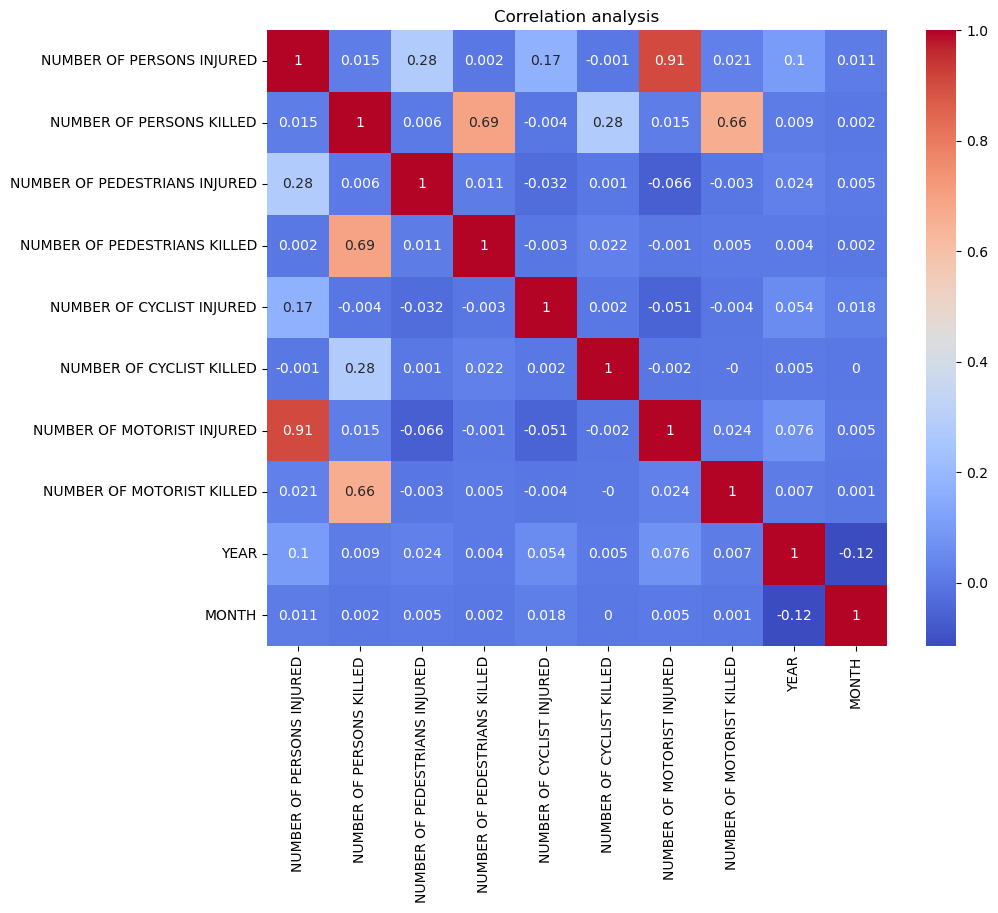

In [12]:
# Data visualization

#checking the correlation between the data
corr = MC_df.select_dtypes('number').drop(['LATITUDE', 'LONGITUDE', 'COLLISION_ID'], axis=1).corr().round(3)
plt.subplots(figsize= (10, 8))
plt.title('Correlation analysis')
sns.heatmap(corr, annot= True, cmap='coolwarm')

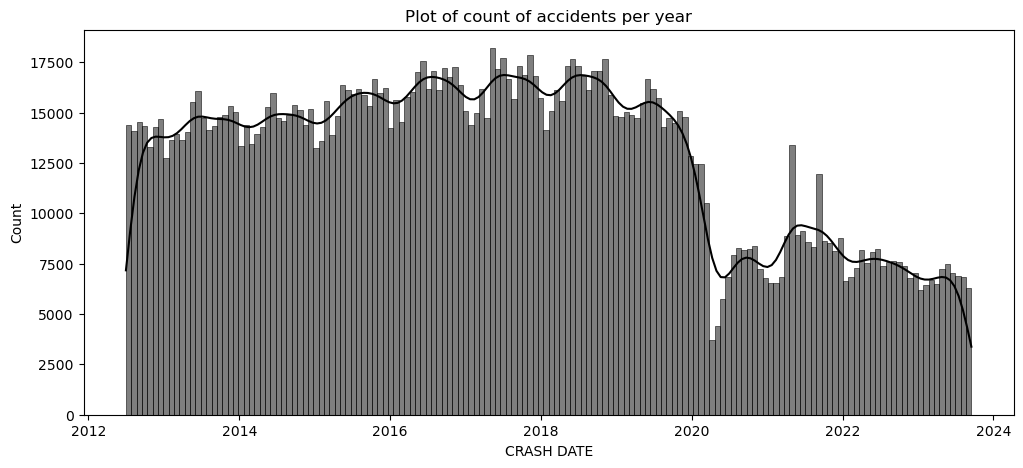

In [21]:
# Plotting a distribution of number of accidents per year
plt.figure(figsize=(12, 5))
plt.title('Plot of count of accidents per year')
sns.histplot(MC_df['CRASH DATE'], kde=True, color='black')
plt.show()

In [23]:
# Grouping the data in DataFrame by its year
MC_df_group = MC_df.groupby('YEAR')[[
    'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF MOTORIST KILLED',
    'NUMBER OF CYCLIST KILLED', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF MOTORIST INJURED',  'NUMBER OF CYCLIST INJURED'
]].sum().reset_index()
MC_df_group[:5]

,YEAR,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF MOTORIST KILLED,NUMBER OF CYCLIST KILLED,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF MOTORIST INJURED,NUMBER OF CYCLIST INJURED
0,2012,137.0,72,59,6,27453.0,5906,19331,2210
1,2013,297.0,176,110,11,55128.0,11988,39064,4075
2,2014,262.0,133,109,20,51223.0,11036,36176,4000
3,2015,243.0,133,95,15,51358.0,10084,36992,4281
4,2016,246.0,149,72,18,60317.0,11090,44011,4975


In [31]:
#Analysing the factors which causes the most number of accidents
MC_df_factor = MC_df.loc[MC_df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[:11].reset_index()
MC_df_factor

,CONTRIBUTING FACTOR VEHICLE 1,count
0,Driver Inattention/Distraction,406786
1,Failure to Yield Right-of-Way,120628
2,Following Too Closely,108946
3,Backing Unsafely,75668
4,Other Vehicular,63330
5,Passing or Lane Usage Improper,56441
6,Passing Too Closely,50668
7,Turning Improperly,50480
8,Fatigued/Drowsy,47373
9,Unsafe Lane Changing,40137


In [50]:
#Pie Figure for the top factors which causing the crashed
MC_fig = px.pie(MC_df_factor, MC_df_factor['CONTRIBUTING FACTOR VEHICLE 1'], MC_df_factor['count'],
             title= 'Pie chart for top factors casuing car crash',
             width=900, height=600)
MC_fig.show()

In [51]:
# Ploting a graph for number of people died vs year
MC_plot1 = px.bar(MC_df_group, x='YEAR', y= ['NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF MOTORIST KILLED', 'NUMBER OF CYCLIST KILLED'],
              text_auto=True, title='Plot for number of people killed by crash vs year', width=900)
MC_plot1.show()

In [52]:
# Plotting the number of injured people per year in a crash
MC_plot2 = px.bar(MC_df_group, x='YEAR', y= ['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF MOTORIST INJURED',  'NUMBER OF CYCLIST INJURED'],
              text_auto=True, title='Plot for number of people injured by crash per year', template='seaborn', width=900)
MC_plot2.show()

In [55]:
# Checking on other factors like seasonality impact on car crashes
# Adding the relevant season information for each month
seasons = {1: 'winter', 2: 'winter', 3: 'spring', 4: 'spring', 5: 'spring', 6: 'summer',
           7: 'summer', 8: 'summer', 9: 'autumn', 10: 'autumn', 11: 'autumn', 12: 'winter'}
MC_df['SEASON'] = MC_df['MONTH'].map(seasons)

# Grouping by each year and seasons
MC_df_season = MC_df.groupby(['YEAR', 'SEASON']).COLLISION_ID.count().reset_index()

# Plotting number of car crashes every season
MC_plot3 = px.histogram(MC_df_season, x='SEASON', y='COLLISION_ID', color='SEASON',
             title='Plot for number of car crashes in each season', template='simple_white', width=900)
MC_plot3.show()

# Plotting number of car crashes by each year and season
MC_plot4 = px.bar(MC_df_season, x='YEAR', y='COLLISION_ID', text_auto=True, color='SEASON', barmode='group',
             title='Bar graph for number of car crashes by each year and season', template='plotly_white', width=900)
MC_plot4.show()

In [57]:
# Creating a new dataframe(MC_df_vehicle) with the most frequent VEHICLE TYPEs that met with accidents

MC_df_vehicle = MC_df.groupby('VEHICLE TYPE CODE 1').count(
).sort_values(by= 'COLLISION_ID', ascending= False).reset_index()[['VEHICLE TYPE CODE 1', 'COLLISION_ID']][:15]

MC_df_vehicle

,VEHICLE TYPE CODE 1,COLLISION_ID
0,Sedan,561163
1,Station Wagon/Sport Utility Vehicle,441343
2,PASSENGER VEHICLE,416206
3,SPORT UTILITY / STATION WAGON,180291
4,Taxi,50538
5,4 dr sedan,40169
6,Pick-up Truck,33832
7,TAXI,31911
8,VAN,25266
9,Box Truck,23812


In [58]:
#As for the invalid values, removing 'Other' and 'Unknown' from the dataframe(MC_df_vehicle)

MC_df_vehicle.drop([10, 12], inplace= True)

# From the output data, merging 'taxi' and 'sedan' duplicate values

MC_df_vehicle['VEHICLE TYPE CODE 1'] = MC_df_vehicle['VEHICLE TYPE CODE 1'].str.lower()
MC_df_vehicle['VEHICLE TYPE CODE 1'] = MC_df_vehicle['VEHICLE TYPE CODE 1'].apply(lambda x:'sedan' if 'sedan' in x else x)
MC_df_vehicle['VEHICLE TYPE CODE 1'] = MC_df_vehicle['VEHICLE TYPE CODE 1'].apply(lambda x:'taxi' if 'taxi' in x else x)

MC_df_vehicle2 = MC_df_vehicle.groupby('VEHICLE TYPE CODE 1').sum().reset_index().sort_values(by= 'COLLISION_ID', ascending= False)

MC_df_vehicle2

,VEHICLE TYPE CODE 1,COLLISION_ID
6,sedan,601332
8,station wagon/sport utility vehicle,441343
4,passenger vehicle,416206
7,sport utility / station wagon,180291
9,taxi,82449
5,pick-up truck,33832
10,van,25266
1,box truck,23812
2,bus,20780
3,large com veh(6 or more tires),14397


In [62]:
#Plotting the graph for the vehicle that met with the accidents the most
MC_df_vehicle = px.pie(MC_df_vehicle2, MC_df_vehicle2['VEHICLE TYPE CODE 1'], MC_df_vehicle2['COLLISION_ID'],
             title= 'Pie chart for the most vehicles met in car crash',
             width=900, height=600)
             
             
MC_df_vehicle.show()